In [1]:
import pandas as pd
import numpy as np
import WranglerFunctions as wf
import matplotlib.pyplot as plt
from tabulate import tabulate

from datetime import datetime
from datetime import timedelta

In [2]:
financial_original = pd.read_csv('../Datasets/Financial_dataset/F3METL_Comp.csv', index_col = False)
inflation_original = pd.read_csv('../Datasets/Economic_dataset/Inflation.csv', index_col = False)

In [3]:
clean_inflation, date_err = wf.Inflation_Wrangler(inflation_original)

In [4]:
clean_financial = wf.F3Metl_Comp_Wrangler(financial_original)

In [5]:
clean_inflation

,Date,Inflation Rate
362,1991-10-31 00:00:00,6.8
361,1991-11-30 00:00:00,7.1
360,1991-12-31 00:00:00,7.2
359,1992-01-31 00:00:00,7.0
358,1992-02-29 00:00:00,6.9
...,...,...
4,2021-08-31 00:00:00,3.2
3,2021-09-30 00:00:00,3.1
2,2021-10-31 00:00:00,4.2
1,2021-11-30 00:00:00,5.1


In [6]:
clean_financial['RIO LN Equity']

,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,PX_VOLUME,EBITDA,PE_RATIO
Dates,,,,,,,
2000-01-04,1239.156,1243.287,1210.242,1217.677,3585947,1404.1713,25.8338
2000-01-05,1210.242,1218.503,1159.024,1163.981,3342568,1404.1713,24.7820
2000-01-06,1173.068,1218.503,1173.068,1205.286,9503906,1404.1713,25.6770
2000-01-07,1214.373,1226.764,1185.459,1220.982,7508500,1404.1713,25.8881
2000-01-10,1224.286,1226.764,1181.329,1193.720,6438418,1404.1713,25.3255
...,...,...,...,...,...,...,...
2022-01-25,5312.000,5353.000,5276.000,5311.000,2538309,19744.0000,6.1803
2022-01-26,5422.000,5506.000,5388.000,5434.000,2878571,19744.0000,6.3346
2022-01-27,5399.000,5623.000,5384.000,5569.000,2943232,19744.0000,6.4205


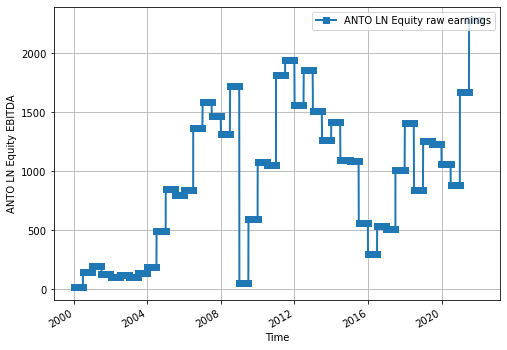

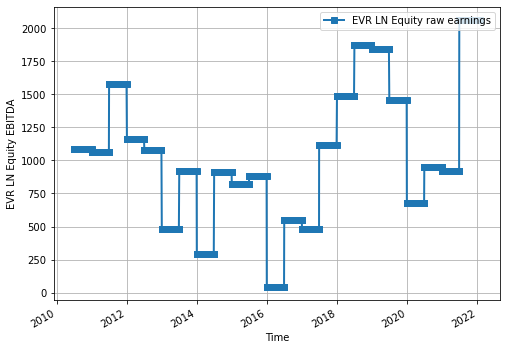

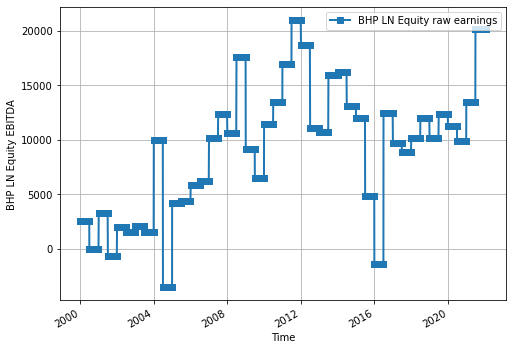

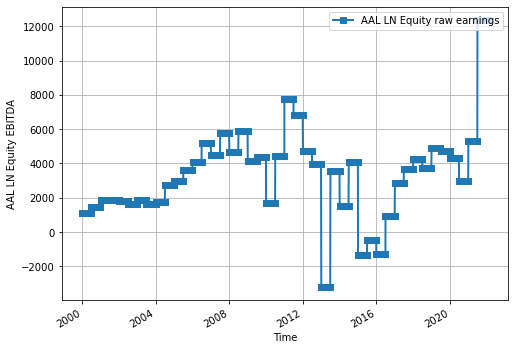

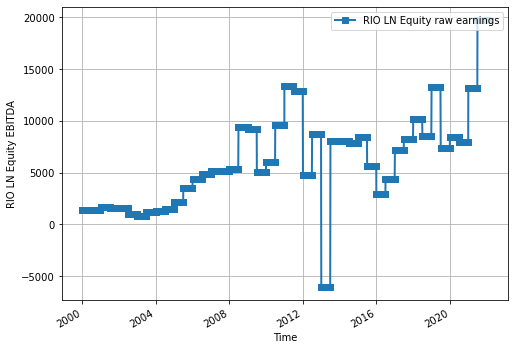

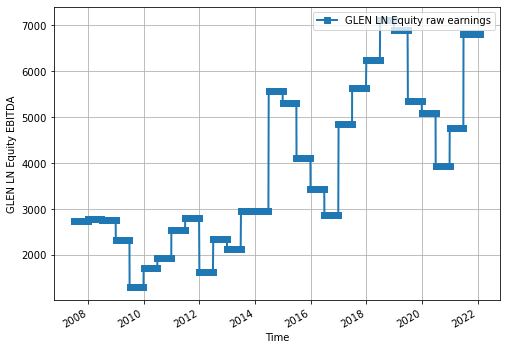

In [7]:
def linePlotCompanyEarnings(df, companyName):
    fig = plt.figure(figsize=(8,6))

    plt.plot(df[companyName].index, df[companyName]['EBITDA'], label=companyName + ' raw earnings', lw=2, marker='s')
    plt.xlabel('Time')
    plt.ylabel(companyName + ' EBITDA')
    plt.grid()
    plt.legend(loc='upper right')

    plt.gcf().autofmt_xdate()

    plt.show()
    
companyNames = set(clean_financial.columns.get_level_values(0).tolist())

for company in companyNames:
    linePlotCompanyEarnings(clean_financial, company)

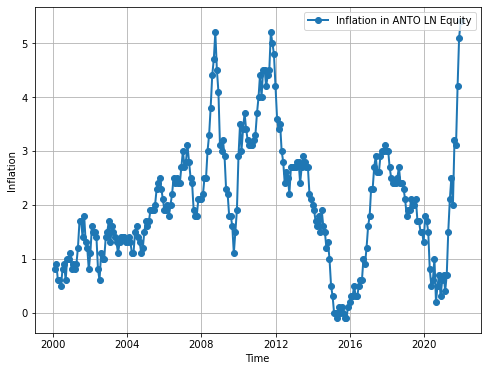

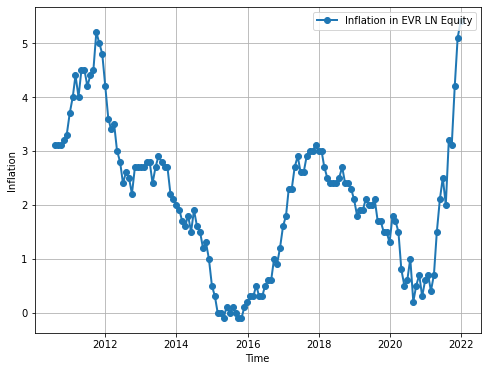

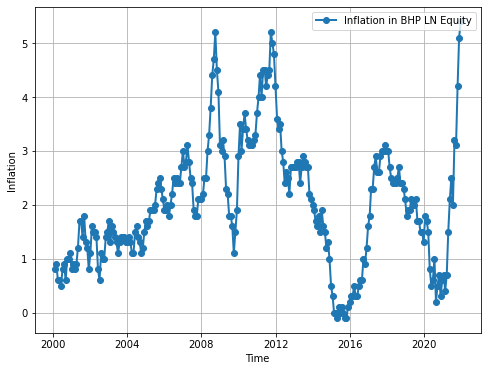

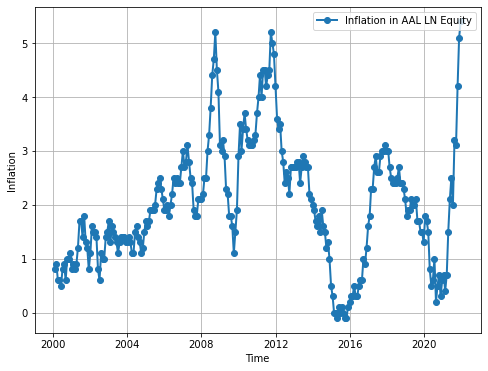

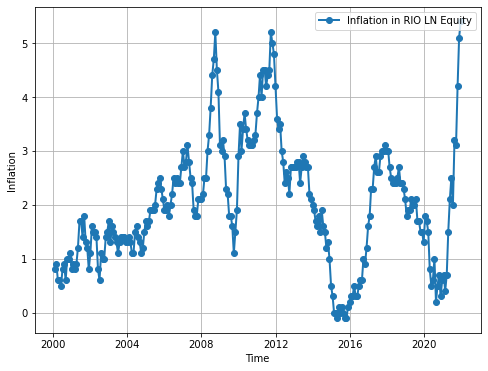

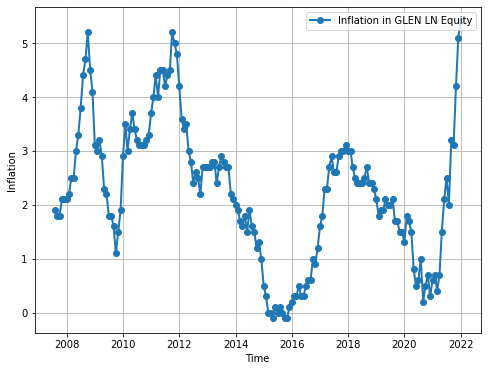

In [8]:
def inflationFromCompanyStart(df_inflation, df_financial, companyName):
    fig = plt.figure(figsize=(8,6))
    df_financial_nonNan = df_financial[companyName]['EBITDA'].dropna()
    
    #print(df_financial_nonNan)
    #print(companyName)
    
    plt.plot(df_inflation[df_inflation['Date'] > df_financial_nonNan.index[0]]['Date'], df_inflation[df_inflation['Date'] > df_financial_nonNan.index[0]]['Inflation Rate'], label='Inflation in ' + companyName, lw=2, marker='o')
    plt.xlabel('Time')
    plt.ylabel('Inflation')
    plt.grid()
    plt.legend(loc='upper right')

    plt.show()

for company in companyNames:
    inflationFromCompanyStart(clean_inflation, clean_financial, company)

In [9]:
# Converting back to normal index since had problems with using datetime as an index
def getEBITDAUnique(df, companyName):
    earnings_unique = df[companyName]['EBITDA'].drop_duplicates()
    earnings_unique = pd.DataFrame(earnings_unique)
    earnings_unique = earnings_unique.dropna()
    earnings_unique = earnings_unique.reset_index()
    return earnings_unique

In [10]:
clean_inflation = clean_inflation.reset_index()
clean_inflation = clean_inflation.drop('index', axis = 1)
clean_inflation

,Date,Inflation Rate
0,1991-10-31 00:00:00,6.8
1,1991-11-30 00:00:00,7.1
2,1991-12-31 00:00:00,7.2
3,1992-01-31 00:00:00,7.0
4,1992-02-29 00:00:00,6.9
...,...,...
358,2021-08-31 00:00:00,3.2
359,2021-09-30 00:00:00,3.1
360,2021-10-31 00:00:00,4.2
361,2021-11-30 00:00:00,5.1


In [11]:
getEBITDAUnique(clean_financial, 'BHP LN Equity')

,Dates,EBITDA
0,2000-01-04,2489
1,2000-06-30,-44
2,2001-01-01,3279
3,2001-07-02,-654
4,2001-12-31,1965
5,2002-07-01,1549
6,2002-12-31,2069
7,2003-06-30,1540
8,2003-12-31,9947
9,2004-06-30,-3530


In [12]:
# O(log n)

def closest_date(dateList, date, start, end):
    if start > end:
        return (start + end) // 2

    mid = (start + end) // 2
    if date == dateList[mid]:
        return mid

    if date < dateList[mid]:
        return closest_date(dateList, date, start, mid-1)
    else:
        return closest_date(dateList, date, mid+1, end)

def add_inflation(df, inflation):
    df['Inflation Rate'] = np.nan
    i = 0
    for i in range(len(df)):
        date = df['Dates'][i]
        closestInflationDate = closest_date(inflation['Date'], date, 0, len(inflation['Date']))
        df.loc[i, 'Inflation Rate'] = inflation['Inflation Rate'][closestInflationDate]
    return df
        
for company in companyNames:
    earnings_unique = getEBITDAUnique(clean_financial, company)
    add_inflation(earnings_unique, clean_inflation)
    
    print(company)
    print(earnings_unique.cov().to_markdown())

ANTO LN Equity
|                |     EBITDA |   Inflation Rate |
|:---------------|-----------:|-----------------:|
| EBITDA         | 375750     |        398.053   |
| Inflation Rate |    398.053 |          1.12577 |
EVR LN Equity
|                |     EBITDA |   Inflation Rate |
|:---------------|-----------:|-----------------:|
| EBITDA         | 260682     |        292.955   |
| Inflation Rate |    292.955 |          1.52352 |
BHP LN Equity
|                |         EBITDA |   Inflation Rate |
|:---------------|---------------:|-----------------:|
| EBITDA         |    3.59535e+07 |       3918.13    |
| Inflation Rate | 3918.13        |          1.12577 |
AAL LN Equity
|                |         EBITDA |   Inflation Rate |
|:---------------|---------------:|-----------------:|
| EBITDA         |    6.68778e+06 |       1527.46    |
| Inflation Rate | 1527.46        |          1.12577 |
RIO LN Equity
|                |         EBITDA |   Inflation Rate |
|:---------------|--------

## Covariance between UK inflation and EBITDA in different companies

AAL LN Equity

|                |         EBITDA |   Inflation Rate |
|:---------------|---------------:|-----------------:|
| EBITDA         |    6.68778e+06 |       1527.46    |
| Inflation Rate | 1527.46        |          1.12577 |

GLEN LN Equity

|                |         EBITDA |   Inflation Rate |
|:---------------|---------------:|-----------------:|
| EBITDA         |    3.10558e+06 |       -620.797   |
| Inflation Rate | -620.797       |          1.41016 |

BHP LN Equity

|                |         EBITDA |   Inflation Rate |
|:---------------|---------------:|-----------------:|
| EBITDA         |    3.59535e+07 |       3918.13    |
| Inflation Rate | 3918.13        |          1.12577 |

ANTO LN Equity

|                |     EBITDA |   Inflation Rate |
|:---------------|-----------:|-----------------:|
| EBITDA         | 375750     |        398.053   |
| Inflation Rate |    398.053 |          1.12577 |

RIO LN Equity

|                |         EBITDA |   Inflation Rate |
|:---------------|---------------:|-----------------:|
| EBITDA         |    2.18944e+07 |       1856.86    |
| Inflation Rate | 1856.86        |          1.17571 |

EVR LN Equity

|                |     EBITDA |   Inflation Rate |
|:---------------|-----------:|-----------------:|
| EBITDA         | 260682     |        292.955   |
| Inflation Rate |    292.955 |          1.52352 |

In [13]:
for company in companyNames:
    earnings_unique = getEBITDAUnique(clean_financial, company)
    add_inflation(earnings_unique, clean_inflation)
    
    print(company)
    print(earnings_unique.corr().to_markdown())

ANTO LN Equity
|                |   EBITDA |   Inflation Rate |
|:---------------|---------:|-----------------:|
| EBITDA         | 1        |         0.612023 |
| Inflation Rate | 0.612023 |         1        |
EVR LN Equity
|                |   EBITDA |   Inflation Rate |
|:---------------|---------:|-----------------:|
| EBITDA         | 1        |         0.464858 |
| Inflation Rate | 0.464858 |         1        |
BHP LN Equity
|                |   EBITDA |   Inflation Rate |
|:---------------|---------:|-----------------:|
| EBITDA         | 1        |         0.615863 |
| Inflation Rate | 0.615863 |         1        |
AAL LN Equity
|                |   EBITDA |   Inflation Rate |
|:---------------|---------:|-----------------:|
| EBITDA         | 1        |         0.556678 |
| Inflation Rate | 0.556678 |         1        |
RIO LN Equity
|                |   EBITDA |   Inflation Rate |
|:---------------|---------:|-----------------:|
| EBITDA         | 1        |         0.365984 

## Pearson's coefficient between UK inflation and earnings of companies

AAL LN Equity

|                |   EBITDA |   Inflation Rate |
|:---------------|---------:|-----------------:|
| EBITDA         | 1        |         0.556678 |
| Inflation Rate | 0.556678 |         1        |

GLEN LN Equity

|                |   EBITDA |   Inflation Rate |
|:---------------|---------:|-----------------:|
| EBITDA         |  1       |         -0.29665 |
| Inflation Rate | -0.29665 |          1       |

BHP LN Equity

|                |   EBITDA |   Inflation Rate |
|:---------------|---------:|-----------------:|
| EBITDA         | 1        |         0.615863 |
| Inflation Rate | 0.615863 |         1        |

ANTO LN Equity

|                |   EBITDA |   Inflation Rate |
|:---------------|---------:|-----------------:|
| EBITDA         | 1        |         0.612023 |
| Inflation Rate | 0.612023 |         1        |

RIO LN Equity

|                |   EBITDA |   Inflation Rate |
|:---------------|---------:|-----------------:|
| EBITDA         | 1        |         0.365984 |
| Inflation Rate | 0.365984 |         1        |

EVR LN Equity

|                |   EBITDA |   Inflation Rate |
|:---------------|---------:|-----------------:|
| EBITDA         | 1        |         0.464858 |
| Inflation Rate | 0.464858 |         1        |

In [14]:
def scatterPlotInflationVsEBITDA(df, companyName):
    fig = plt.figure(figsize=(8,6))

    plt.scatter(earnings_unique['Inflation Rate'], earnings_unique['EBITDA'])
    plt.xlabel('UK Inflation')
    plt.ylabel('EBITDA in ' + companyName)
    plt.grid()
    plt.show()

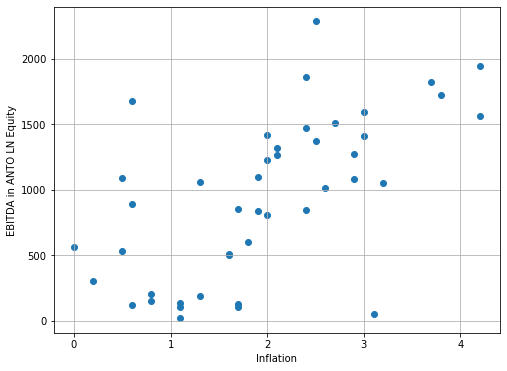

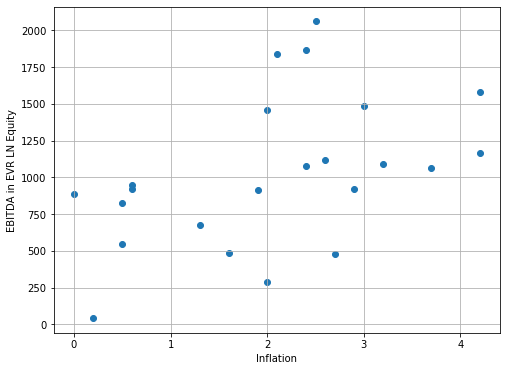

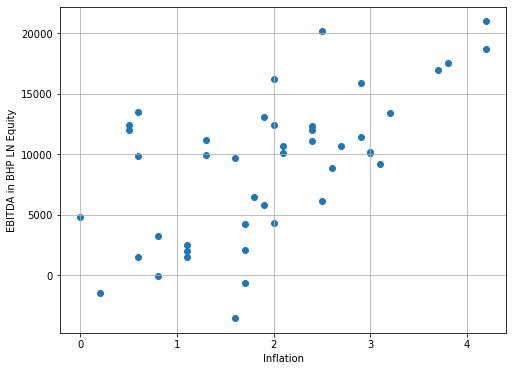

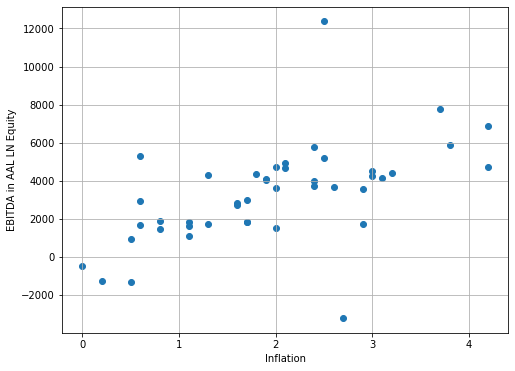

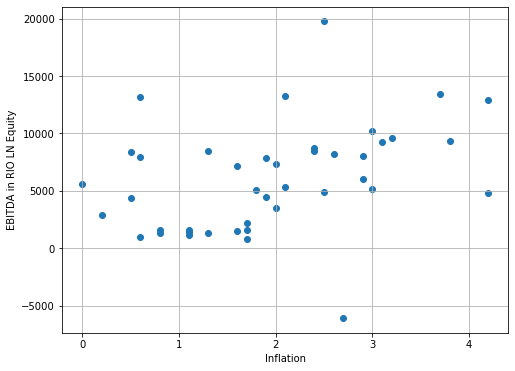

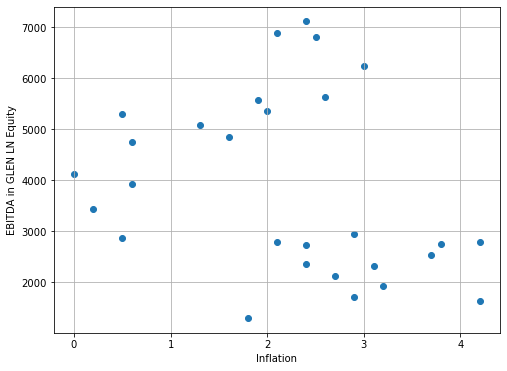

In [15]:
for company in companyNames:
    earnings_unique = getEBITDAUnique(clean_financial, company)
    add_inflation(earnings_unique, clean_inflation)
    
    scatterPlotInflationVsEBITDA(earnings_unique, company)

## Exploring relationship between earnings of competitors and company earnings

In [16]:
earningsList = []
for company in companyNames:
    earningsList.append(clean_financial[company]['EBITDA'])
earnings = pd.DataFrame(np.array(earningsList).T, columns = companyNames)
earnings.index = clean_financial.index
earnings

,ANTO LN Equity,EVR LN Equity,BHP LN Equity,AAL LN Equity,RIO LN Equity,GLEN LN Equity
Dates,,,,,,
2000-01-04,20.1981,NaN,2489.0,1118.0,1404.1713,NaN
2000-01-05,20.1981,NaN,2489.0,1118.0,1404.1713,NaN
2000-01-06,20.1981,NaN,2489.0,1118.0,1404.1713,NaN
2000-01-07,20.1981,NaN,2489.0,1118.0,1404.1713,NaN
2000-01-10,20.1981,NaN,2489.0,1118.0,1404.1713,NaN
...,...,...,...,...,...,...
2022-01-25,2283.1000,2061.0,20181.0,12367.0,19744.0000,6806.0
2022-01-26,2283.1000,2061.0,20181.0,12367.0,19744.0000,6806.0
2022-01-27,2283.1000,2061.0,20181.0,12367.0,19744.0000,6806.0


In [17]:
earnings.cov()

,ANTO LN Equity,EVR LN Equity,BHP LN Equity,AAL LN Equity,RIO LN Equity,GLEN LN Equity
ANTO LN Equity,3.726161e+05,1.317217e+05,2.929310e+06,9.781110e+05,1.825055e+06,5.976215e+04
EVR LN Equity,1.317217e+05,2.551072e+05,1.127920e+06,1.196673e+06,1.582544e+06,4.492687e+05
BHP LN Equity,2.929310e+06,1.127920e+06,3.557232e+07,8.696303e+06,1.916980e+07,-2.227498e+05
AAL LN Equity,9.781110e+05,1.196673e+06,8.696303e+06,6.839442e+06,9.138545e+06,1.115259e+06
RIO LN Equity,1.825055e+06,1.582544e+06,1.916980e+07,9.138545e+06,2.116724e+07,3.500013e+06
GLEN LN Equity,5.976215e+04,4.492687e+05,-2.227498e+05,1.115259e+06,3.500013e+06,2.954192e+06


In [18]:
earnings.corr()

,ANTO LN Equity,EVR LN Equity,BHP LN Equity,AAL LN Equity,RIO LN Equity,GLEN LN Equity
ANTO LN Equity,1.000000,0.524181,0.804597,0.612699,0.649850,0.067227
EVR LN Equity,0.524181,1.000000,0.467758,0.720524,0.656872,0.528885
BHP LN Equity,0.804597,0.467758,1.000000,0.557530,0.698601,-0.028510
AAL LN Equity,0.612699,0.720524,0.557530,1.000000,0.759512,0.215109
RIO LN Equity,0.649850,0.656872,0.698601,0.759512,1.000000,0.463559
GLEN LN Equity,0.067227,0.528885,-0.028510,0.215109,0.463559,1.000000


We can see below that some companies have EBITDA very correlated to other companies earnings. For example AAL LN Equity and RIO LN Equity have a correlation of 0.86. - Maybe a reason for interconnectedness between these two companies which we may look into.

I expected AAL and BHP to be higher since they are both Australian companies.

In [19]:
earnings.dropna().corr()

,ANTO LN Equity,EVR LN Equity,BHP LN Equity,AAL LN Equity,RIO LN Equity,GLEN LN Equity
ANTO LN Equity,1.000000,0.524181,0.759252,0.660362,0.516515,-0.057013
EVR LN Equity,0.524181,1.000000,0.467758,0.720524,0.656872,0.528885
BHP LN Equity,0.759252,0.467758,1.000000,0.656598,0.488133,-0.130679
AAL LN Equity,0.660362,0.720524,0.656598,1.000000,0.861145,0.293249
RIO LN Equity,0.516515,0.656872,0.488133,0.861145,1.000000,0.448808
GLEN LN Equity,-0.057013,0.528885,-0.130679,0.293249,0.448808,1.000000
